In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.shape#смотрим размероность

(271116, 15)

In [4]:
df.head()#какие столбцы и их типы

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# 1.Сколько лет было самым молодым мужчине и женщине участникам Олимпийских игр 1992 года?

In [5]:
#формируем датафрейм с участниками 1992 года
mask_year_1992 = df['Year'] == 1992
athlete_1992 = df[mask_year_1992]

In [6]:
#датафрейм мужчины
mask_men_1992 = athlete_1992['Sex'] == 'M'
men_1992 = athlete_1992[mask_men_1992]

In [7]:
#датафрейм женщины
mask_female_1992 = athlete_1992['Sex'] == 'F'
female_1992 = athlete_1992[mask_female_1992]

In [8]:
#ищем индекс самого младшего участника среди мучжин. т.к. индекс привязан к исходному датафрейму, то
#нужно вытащить оттуда данные
mask_min_age_men = men_1992['Age'].idxmin()
print('Самому молодому мужчине было:', df.iloc[mask_min_age_men]['Age'], ' лет. Имя:', df.iloc[mask_min_age_men]['Name'])

Самому молодому мужчине было: 11.0  лет. Имя: Carlos Bienvenido Front Barrera


In [9]:
#таже самая процедура для женщин
mask_min_age_female = female_1992['Age'].idxmin()
print('Самой молодой девушке было:', df.iloc[mask_min_age_female]['Age'], ' лет. Имя:', df.iloc[mask_min_age_female]['Name'])

Самой молодой девушке было: 12.0  лет. Имя: Judit Kiss


# 2.Каков был процент баскетболистов среди мужчин участников Олимпийских игр 2012 года? Округлите ответ до первого знака после запятой.

In [10]:
#формируем датафрейм с участниками 2012 года
mask_year_2012 = (df['Year'] == 2012) &(df['Sex'] == 'M') 
athlete_2012 = df[mask_year_2012]

In [11]:
all_athlete = athlete_2012.shape[0]#общее кол-о мужчин участников
all_athlete

7105

In [12]:
num_basketball = athlete_2012[athlete_2012['Sport'] == 'Basketball'].shape[0]
num_basketball

144

In [13]:
percent = num_basketball/all_athlete * 100
print('Процент баскетолистов среди мужчин в 2012 - {:.1f}'.format(percent))

Процент баскетолистов среди мужчин в 2012 - 2.0


# 3.Найдите спортсмена, который участвовал в Олимпийских играх 2006 года, с наибольшим весом среди других участников той же Олимпиады. Каким спортом он занимался?

In [14]:
df_2006 = df[df['Year'] == 2006] # все участники 2006
df_2006.shape

(4382, 15)

In [15]:
index_max_weight = df_2006['Weight'].idxmax()#ищем индекс участника с максимальным весом по столбцу "вес"
#df[df['Year'] == 2006]['Weight'].idxmax() - эквивалент
print('Участник Олимпийских игр 2006 года имел максимальный вес: {0:d}'.format(int(df.iloc[index_max_weight]['Weight'])))
print('Он занимался: ',df.iloc[index_max_weight]['Sport'])

Участник Олимпийских игр 2006 года имел максимальный вес: 127
Он занимался:  Skeleton


# 4.Какова абсолютная разница между количеством уникальных видов спорта на Олимпийских играх 1992 года и Олимпийских играх 2002 года?

In [16]:
df_1992 = df[df['Year'] == 1992]# датафрейм за 1992
df_1992.shape

(16413, 15)

In [17]:
df_2002 = df[df['Year'] == 2002]# датафрейм за 1992
df_2002.shape

(4109, 15)

In [18]:
num_unique_1992 = df_1992['Sport'].nunique()
num_unique_2002 = df_2002['Sport'].nunique()
abs_diff = abs(num_unique_1992 - num_unique_2002)
print('Абсолютная разница между количеством уникальных видов спорта на Олимпийских играх 1992 года')
print('и Олимпийских играх 2002 года: {0:d}'.format(abs_diff))

Абсолютная разница между количеством уникальных видов спорта на Олимпийских играх 1992 года
и Олимпийских играх 2002 года: 26


# 5.Отобразить на графике взаимосвязь рост-вес, и оценить уровень взаимовлияния.

### Здесь задача решена в "лоб". Показана взаимосвязь за весь период. Мне кажеться нужно брать взаимосвязь за каждый год и строить соот-ие графики и вычислять корр-ю

Text(0.5, 1.0, 'Взаимосвязь рост-вес')

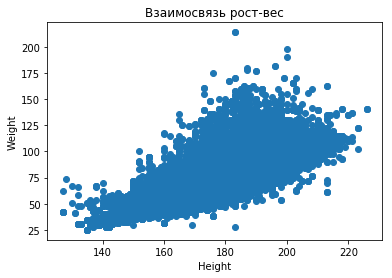

In [19]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Взаимосвязь рост-вес')

In [20]:
print('уровень взаимовлияния роста на вес - {0:.3f}'.format(df.Height.corr(df.Weight)))

уровень взаимовлияния роста на вес - 0.796


### По графику видно что с увелечением роста - ростет и вес спортсмена, но не пропорционально изменению роста.

# 6.Отобразить на графике статистику по колличеству женщин завоивавших золотую медаль в летних видах спорта.

In [21]:
num_gold = df[(df['Sex'] == 'F')&(df['Season'] == 'Summer')
              &(df['Medal'] == 'Gold')].shape[0]#количество женщин которые учавствовали в летних играх и получили золото
num_gold

3140

In [22]:
num_all = df[(df['Sex'] == 'F') & (df['Season'] == 'Summer')].shape[0]#сколько всего женщин учавствовало в летинх играх
num_all

59443

In [23]:
num_silver = df[(df['Sex'] == 'F')&(df['Season'] == 'Summer')
              &(df['Medal'] == 'Silver')].shape[0]#количество женщин которые учавствовали в летних играх и получили серебро
num_silver

3128

In [24]:
num_bronze = df[(df['Sex'] == 'F')&(df['Season'] == 'Summer')
              &(df['Medal'] == 'Bronze')].shape[0]#количество женщин которые учавствовали в летних играх и получили бронзу
num_bronze

3174

In [25]:
#заносим все эти цифры в серию для вывода
all_medal = pd.Series([num_all, num_gold, num_silver, num_bronze], 
                      index=['Всего участников', 'Золото', 'Серебро', 'Бронза'])
all_medal

Всего участников    59443
Золото               3140
Серебро              3128
Бронза               3174
dtype: int64

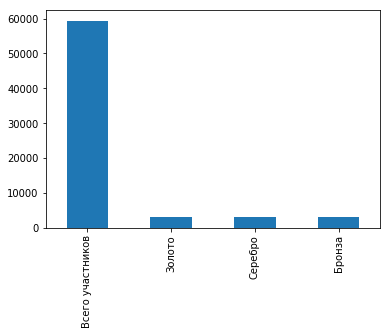

In [26]:
all_medal.plot(kind = 'bar')

# 8.Обучить модель на числовых данных для расспознования мужчин и женщин в предложенном датасете.

### Пропуски в данных до 25%(рост, вес). По возрасту примерно 5%. Классификация как мне кажеться должна основываться на росте и весе участинка(у мужчин и женщин они разные). В связи с этим важно корректно заполнить эти данные. Моя гипотеза сводиться к тому что рост и вес участника зависит от вида спорта. Т.е. в баскетбол скорее всего будут играть высокие игроки и в то же время борцы будут более низкого роста и большего веса. Поэтому нужно разделить данные на поднаборы по видам спорта и исходя из этих данных заполнить пропуски(к примеру средним, но он будет чувствителен к выбросам). Данный алгоритм не реализовал в связи с ограничением времени. И решил задачу "в лоб" - удалил все строки где есть пропуски по росту, весу и возрасту.
### Так же при анализе выявлено что по некоторым видам спорта нету данных по весу, росту(в основном к играм до 1950). И вся цифровая информация сводиться к возрасту. В таком случае нужен анализ имен. Это нам не подходит и в связи с этим нужно удалить эти данные из тренировачного набора. Данный функционал так же не реализован

### Исследую данные по зависимости пола от роста и веса

In [27]:
men = df[df.Sex == 'M']
men.shape

(196594, 15)

In [28]:
female = df[df.Sex == 'F']
female.shape

(74522, 15)

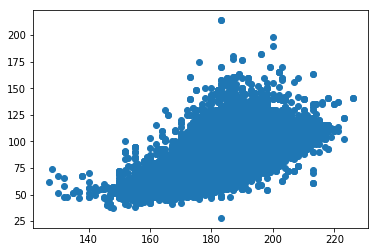

In [29]:
plt.scatter(men.Height, men.Weight)

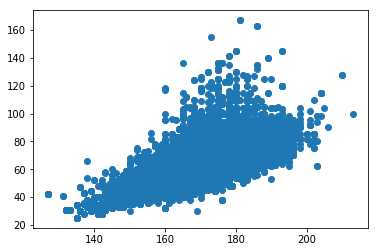

In [30]:
plt.scatter(female.Height, female.Weight)

In [31]:
df_HW = df[['Height', 'Weight', 'Age', 'Sex']]
df_HW.shape

(271116, 4)

In [32]:
df_HW.head()

,Height,Weight,Age,Sex
0,180.0,80.0,24.0,M
1,170.0,60.0,23.0,M
2,NaN,NaN,24.0,M
3,NaN,NaN,34.0,M
4,185.0,82.0,21.0,F


In [33]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Смотрю на пропуски в данных

In [34]:
df['Weight'].isna().sum()#сколько пропусков в даных по весу

62875

In [35]:
df['Height'].isna().sum()#сколько пропусков в даных по росту

60171

In [36]:
df['Age'].isna().sum()#сколько пропусков в даных по возрасту

9474

In [37]:
df.isnull().sum()#общий вид по пропускам

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [38]:
df['Sport'].nunique()#количество уникальных видов спорта

66

In [39]:
df['Sport'].unique()#имена уникальных видов спорта
#по некторым видам спорта нету данных по весу и росту(такое наблюдаеться примерно до 1950 года), соотв-о по ним 
#не сможем дать никакого ответа(проще по ним бросать монету).
#Если только не возмьмем статистику по полу людей которые учавствовали в таком виде спорта и на основании этих данных 
#делать предположения

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

### Пример заполнения пропусков

In [40]:
df_copy = df.copy()
df_bas = df_copy[df_copy['Sport'] == 'Basketball'] #беру баскетбол для первоначального анализа

In [41]:
df_bas.describe()#есть пропуски в росте и весе. но пропущенны не все значения. пропуски можно заполнить средним значением

,ID,Age,Height,Weight,Year
count,4536.000000,4350.000000,3881.000000,3678.000000,4536.000000
mean,66967.785494,25.324598,190.869879,85.777053,1981.830688
std,39076.925471,3.881247,11.459243,14.817590,23.233772
min,1.000000,16.000000,161.000000,50.000000,1936.000000
25%,31726.000000,22.000000,183.000000,75.000000,1960.000000
50%,68185.000000,25.000000,190.000000,85.000000,1984.000000
75%,100193.000000,28.000000,198.000000,95.000000,2004.000000
max,135568.000000,40.000000,226.000000,156.000000,2016.000000


In [42]:
mean_H = df_bas['Height'].mean()#средний рост. !Те виды спорта где полностью пропущены данные находяться по среднему(NaN)
mean_H

190.86987889719146

In [43]:
mean_W = df_bas['Weight'].mean()#средний вес
mean_W

85.77705274605763

In [44]:
df_bas['Height'] = df_bas['Height'].fillna(mean_H) #заполняем пропуски в росте средним и смотрим что получилось
df_bas.describe()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ID,Age,Height,Weight,Year
count,4536.000000,4350.000000,4536.000000,3678.000000,4536.000000
mean,66967.785494,25.324598,190.869879,85.777053,1981.830688
std,39076.925471,3.881247,10.599445,14.817590,23.233772
min,1.000000,16.000000,161.000000,50.000000,1936.000000
25%,31726.000000,22.000000,184.000000,75.000000,1960.000000
50%,68185.000000,25.000000,190.869879,85.000000,1984.000000
75%,100193.000000,28.000000,197.000000,95.000000,2004.000000
max,135568.000000,40.000000,226.000000,156.000000,2016.000000


## Начинаем анализ данных

In [45]:
df_HW.shape#наш исходный датафрейм

(271116, 4)

In [46]:
df_HW.head()

,Height,Weight,Age,Sex
0,180.0,80.0,24.0,M
1,170.0,60.0,23.0,M
2,NaN,NaN,24.0,M
3,NaN,NaN,34.0,M
4,185.0,82.0,21.0,F


In [47]:
df_HW.dropna(inplace = True) #удаляем все строки с пропусками

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_HW.shape

(206165, 4)

In [49]:
df_HW.head()

,Height,Weight,Age,Sex
0,180.0,80.0,24.0,M
1,170.0,60.0,23.0,M
4,185.0,82.0,21.0,F
5,185.0,82.0,21.0,F
6,185.0,82.0,25.0,F


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


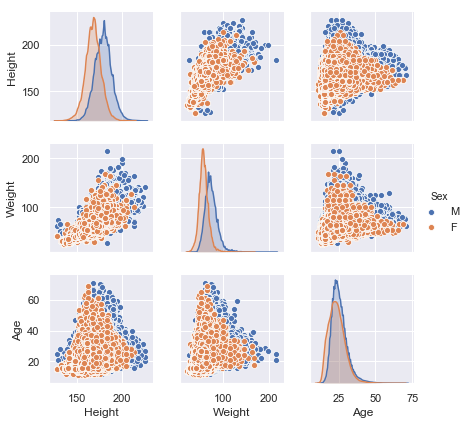

In [50]:
import seaborn as sns
sns.set()
%matplotlib inline
# строим граффики с точками(обозначают конкретного спортсмена) по разным наборам коор-т(вес, рос, возраст)
sns.pairplot(df_HW, hue = 'Sex', height = 10, size = 2 )

### Из этих данных видно что данные очень сильно сгруппированы и нельзя ожидать хороших показаний при классификации

In [51]:
X = df_HW.drop('Sex', axis = 1)#разделяем признаки и метки
X.shape

(206165, 3)

In [52]:
X.head()

,Height,Weight,Age
0,180.0,80.0,24.0
1,170.0,60.0,23.0
4,185.0,82.0,21.0
5,185.0,82.0,21.0
6,185.0,82.0,25.0


In [53]:
y = df_HW['Sex']#метки
y.shape

(206165,)

In [54]:
y.head()

0    M
1    M
4    F
5    F
6    F
Name: Sex, dtype: object

In [56]:
from sklearn.model_selection import train_test_split #делим данные на обучающие и тестовые

In [57]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

In [58]:
Xtrain.shape

(154623, 3)

In [59]:
Xtest.shape

(51542, 3)

In [60]:
ytrain.shape

(154623,)

In [63]:
#Гауссов наивный байесовский классфикатор
from sklearn.naive_bayes import GaussianNB
model_Gaussian = GaussianNB()
model_Gaussian.fit(Xtrain, ytrain)
y_predict = model_Gaussian.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_predict)

0.7796554266423499

In [64]:
#9.Оценить модель используя sklearn.model_selection.cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(model_Gaussian, X, y, cv = 5)

array([0.78226706, 0.78718502, 0.77030534, 0.78565712, 0.77158518])

In [65]:
#Метод k-средних c 1 соседом
from sklearn.neighbors import KNeighborsClassifier
model_KN_1 = KNeighborsClassifier(n_neighbors= 1)
cross_val_score(model_KN_1, X, y, cv = 5)

array([0.71938206, 0.72754832, 0.71265734, 0.72221279, 0.72067811])

In [72]:
model_KN_11 = KNeighborsClassifier(n_neighbors= 11)
model_KN_11.fit(Xtrain, ytrain)
y_predict_KN_11 = model_KN_11.predict(Xtest)
accuracy_score(ytest, y_predict_KN_11)

0.797427340809437

In [66]:
#Метод k-средних c 2 соседом
from sklearn.neighbors import KNeighborsClassifier
model_KN_1 = KNeighborsClassifier(n_neighbors= 2)
cross_val_score(model_KN_1, X, y, cv = 5)

array([0.6933841 , 0.70559988, 0.68564014, 0.70137996, 0.69581878])

In [67]:
#Метод k-средних c 3 соседом
from sklearn.neighbors import KNeighborsClassifier
model_KN_1 = KNeighborsClassifier(n_neighbors= 3)
cross_val_score(model_KN_1, X, y, cv = 5)

array([0.74921182, 0.75315888, 0.74401572, 0.75429874, 0.74869034])

In [68]:
#Метод k-средних c 5 соседом
from sklearn.neighbors import KNeighborsClassifier
model_KN_1 = KNeighborsClassifier(n_neighbors= 5)
cross_val_score(model_KN_1, X, y, cv = 5)

array([0.76172576, 0.76596415, 0.75810637, 0.76210802, 0.75705763])

In [69]:
#Метод k-средних c 9 соседом
from sklearn.neighbors import KNeighborsClassifier
model_KN_1 = KNeighborsClassifier(n_neighbors= 9)
cross_val_score(model_KN_1, X, y, cv = 5)

array([0.77693166, 0.77319138, 0.76511532, 0.77316712, 0.76654055])

In [75]:
#смотрю как изменяеться оценка при изменении кол-а соседей
for i in range(3,21,2):
    model_KNN = KNeighborsClassifier(n_neighbors = i )
    print('Количество соседей: ', i)
    print('cross_val_score:',cross_val_score(model_KNN, X, y, cv = 5))

Количество соседей:  3
cross_val_score: [0.74921182 0.75315888 0.74401572 0.75429874 0.74869034]
Количество соседей:  5
cross_val_score: [0.76172576 0.76596415 0.75810637 0.76210802 0.75705763]
Количество соседей:  7
cross_val_score: [0.76727943 0.76982029 0.76232629 0.77149371 0.76244179]
Количество соседей:  9
cross_val_score: [0.77693166 0.77319138 0.76511532 0.77316712 0.76654055]
Количество соседей:  11
cross_val_score: [0.77967212 0.77559237 0.76812262 0.77610167 0.76787447]
Количество соседей:  13
cross_val_score: [0.78202454 0.77777508 0.77178474 0.77976378 0.76906286]
Количество соседей:  15
cross_val_score: [0.78343115 0.77886644 0.77319138 0.77986079 0.77073632]
Количество соседей:  17
cross_val_score: [0.78498327 0.78117042 0.77493755 0.78209201 0.77105161]
Количество соседей:  19
cross_val_score: [0.78845128 0.78408071 0.77559237 0.78519632 0.77459255]


In [70]:
#Метод стохастического градиентного спуска
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(random_state= 42)
cross_val_score(model_sgd, X, y, cv = 5)

array([0.76616385, 0.76952926, 0.74874494, 0.7664007 , 0.69106519])

### Вывод. Лучший показатель у KNN классификатора - 78.84% при 19 соседях.

# 10.написать собственный класс KNN, без использования готовых реализаций с функциями fit и predict.


In [98]:
from collections import Counter
class KNClass_My:
    #инициализируем. k - количество соседей
    def __init__(self, k): 
        self.k = k
        self.X = None
        self.y = None
    #Задаем обучающие данные. X - обучающие данные, y - метки
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X_t):#предсказание. X_t - данные которые нужно классифицировать
        pred_y = [] # предсказанные метки для X_t
        #Находим евклидово расстояние для каждого набора X_t до каждой точки в обучающей выборки X
        #Эти данные заносяться в список dist_class в виде пар (расстояние, метка для данной обучающей выборки)
        for i in range(X_t.shape[0]):#проходим по всем точка тестового набора
            #print('', i)
            dist_class = []#список расстояний и меток от i-го набора тестовых данных до каждой точки обучающей выборки
            for j in range(self.X.shape[0]):#проходим все точки обучающей выборки
                #print('\t', j)
                #вычисляем евклидово расстояние от i-ой точки до j-ой
                distance = np.sqrt(np.sum((X_t.iloc[i, :] - self.X.iloc[j, :])**2)) 
                #print('i:',i , 'j:', j, 'dist',  distance)
                dist_class.append((distance, self.y.iloc[j]))#записываем пару (расстояние, метка)
            dist_class.sort()#сортируем по возрастанию
            dist_class = dist_class[:self.k]#выбираем первые k элементов
            y_class = [y for x, y in dist_class]#выбираем метки первых k элементов
            y_class = Counter(y_class).most_common(1)#формируем список пар вида (метка:сколько раз встречаеться) и
            #выбираем первую пару
            pred_y.append(y_class[0][0])#выбираем метку(т.к. она находиться первой в паре)
        return pred_y
    

In [100]:
#моя модель работает очень медленно, поэтому обучающая выборка ограниченна 1000
#и предсказываю только для первых 100 экземпляров из тестовой выборки
model_KNN_my = KNClass_My(5)
model_KNN_my.fit(Xtrain[:1000], ytrain[:1000])
y_pred = model_KNN_my.predict(Xtest[:100])


 0
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 1

	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 63

 3
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 1

	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 76

	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 28

	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 71

	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 9
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 1

	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 63

	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 12
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 

	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 402
	 403
	 404
	 405
	 406
	 407
	 408
	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 419
	 420
	 421
	 422
	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 53

	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 15
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97


	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 58

	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194


	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 65

	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 29

	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 77

	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239


	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 79

	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 25

	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 827
	 828
	 829
	 830
	 83

	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 299
	 300
	 301
	 302
	 303
	 304
	 305
	 306
	 307
	 308
	 309
	 310
	 311
	 312
	 313
	 314
	 315
	 316
	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 39

	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 827
	 828
	 82

	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 299
	 300
	 301
	 302
	 303
	 304
	 305
	 306
	 307
	 308
	 309
	 310
	 311
	 312
	 313
	 314
	 315
	 316
	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 37

	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 827
	 828
	 829
	 830
	 831
	 832
	 833
	 834
	 835
	 836
	 837
	 838
	 839
	 840
	 841
	 842
	 843
	 844
	 845
	 846
	 847
	 848
	 849
	 850
	 851
	 852
	 853
	 854
	 855
	 856
	 857
	 858
	 859
	 860
	 861
	 862
	 863
	 864
	 865
	 866
	 867
	 868
	 869
	 870
	 871
	 872
	 873
	 874
	 875
	 876
	 877
	 878
	 879
	 880
	 881
	 882
	 883
	 884
	 885
	 886
	 887
	 888
	 889
	 890
	 891
	 892
	 893
	 894
	 895
	 896
	 897
	 898
	 899
	 900
	 901
	 902
	 903
	 904
	 905
	 906
	 907
	 908
	 909
	 910
	 911
	 912
	 913
	 914
	 915
	 916
	 91

	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 299
	 300
	 301
	 302
	 303
	 304
	 305
	 306
	 307
	 308
	 309
	 310
	 311
	 312
	 313
	 314
	 315
	 316
	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 40

	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 827
	 828
	 829
	 830
	 831
	 832
	 833
	 834
	 835
	 836
	 837
	 838
	 839
	 840
	 841
	 842
	 843
	 844
	 845
	 846
	 847
	 848
	 849
	 850
	 851
	 852
	 853
	 854
	 855
	 856
	 857
	 858
	 859
	 860
	 861
	 862
	 863
	 864
	 865
	 866
	 867
	 868
	 869
	 870
	 871
	 872
	 873
	 874
	 875
	 876
	 877
	 878
	 879
	 880
	 881
	 882
	 883
	 884
	 885
	 886
	 887
	 888
	 889
	 890
	 891
	 892
	 893
	 894
	 895
	 896
	 897
	 898
	 899
	 900
	 901
	 902
	 903
	 904
	 905
	 906
	 907
	 908
	 909
	 910
	 911
	 912
	 913
	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 96

	 311
	 312
	 313
	 314
	 315
	 316
	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 402
	 403
	 404
	 405
	 406
	 407
	 408
	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 419
	 420
	 421
	 422
	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 47

	 867
	 868
	 869
	 870
	 871
	 872
	 873
	 874
	 875
	 876
	 877
	 878
	 879
	 880
	 881
	 882
	 883
	 884
	 885
	 886
	 887
	 888
	 889
	 890
	 891
	 892
	 893
	 894
	 895
	 896
	 897
	 898
	 899
	 900
	 901
	 902
	 903
	 904
	 905
	 906
	 907
	 908
	 909
	 910
	 911
	 912
	 913
	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 41
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 4

	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 59

	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 

	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 79

	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	

	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 75

	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 299
	 30

	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 827
	 828
	 829
	 830
	 831
	 832
	 833
	 834
	 835
	 836
	 837
	 838
	 839
	 840
	 841
	 842
	 843
	 844
	 845
	 846
	 847
	 848
	 849
	 850
	 851
	 852
	 853
	 854
	 855
	 856
	 857
	 858
	 859
	 860
	 861
	 862
	 863
	 864
	 865
	 866
	 867
	 868
	 869
	 870
	 871
	 872
	 873
	 87

	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 402
	 403
	 404
	 405
	 406
	 407
	 408
	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 419
	 420
	 421
	 422
	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 48

	 885
	 886
	 887
	 888
	 889
	 890
	 891
	 892
	 893
	 894
	 895
	 896
	 897
	 898
	 899
	 900
	 901
	 902
	 903
	 904
	 905
	 906
	 907
	 908
	 909
	 910
	 911
	 912
	 913
	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 55
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	

	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 60

	 892
	 893
	 894
	 895
	 896
	 897
	 898
	 899
	 900
	 901
	 902
	 903
	 904
	 905
	 906
	 907
	 908
	 909
	 910
	 911
	 912
	 913
	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 58
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 7

	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 66

	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	

	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 82

	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	

	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 75

	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 67
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 

	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 70

	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249


	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 74

	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 299
	 300
	 301
	 302
	 303
	 304
	 30

	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 82

	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 221
	 222
	 223
	 224
	 225
	 226
	 227
	 228
	 229
	 230
	 231
	 232
	 233
	 234
	 235
	 236
	 237
	 238
	 239
	 240
	 241
	 242
	 243
	 244
	 245
	 246
	 247
	 248
	 249
	 250
	 251
	 252
	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 299
	 300
	 301
	 302
	 303
	 304
	 305
	 306
	 307
	 308
	 309
	 310
	 311
	 312
	 313
	 314
	 315
	 316
	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 33

	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 655
	 656
	 657
	 658
	 659
	 660
	 661
	 662
	 663
	 664
	 665
	 666
	 667
	 668
	 669
	 670
	 671
	 672
	 673
	 674
	 675
	 676
	 677
	 678
	 679
	 680
	 681
	 682
	 683
	 684
	 685
	 686
	 687
	 688
	 689
	 690
	 691
	 692
	 693
	 694
	 695
	 696
	 697
	 698
	 699
	 700
	 701
	 702
	 703
	 704
	 705
	 706
	 707
	 708
	 709
	 710
	 711
	 712
	 713
	 714
	 715
	 716
	 717
	 718
	 719
	 720
	 721
	 722
	 723
	 724
	 725
	 726
	 727
	 728
	 729
	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 80

	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 163
	 164
	 165
	 166
	 167
	 168
	 169
	 170
	 171
	 172
	 173
	 174
	 175
	 176
	 177
	 178
	 179
	 180
	 181
	 182
	 183
	 184
	 185
	 186
	 187
	 188
	 189
	 190
	 191
	 192
	 193
	 194
	 195
	 196
	 197
	 198
	 199
	 200
	 201
	 202
	 203
	 204
	 205
	 206
	 207
	 208
	 209
	 210
	 211
	 212
	 213
	 214
	 215
	 216
	 217
	 218
	 219
	 220
	 22

	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 61

	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 82
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 

	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 402
	 403
	 404
	 405
	 406
	 407
	 408
	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 419
	 420
	 421
	 422
	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 53

	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 827
	 828
	 829
	 830
	 831
	 832
	 833
	 834
	 835
	 836
	 837
	 838
	 839
	 840
	 841
	 842
	 843
	 844
	 845
	 846
	 847
	 848
	 849
	 850
	 851
	 852
	 853
	 854
	 855
	 856
	 857
	 858
	 859
	 860
	 861
	 862
	 863
	 864
	 865
	 866
	 867
	 868
	 869
	 870
	 871
	 872
	 873
	 874
	 875
	 876
	 877
	 878
	 879
	 880
	 881
	 882
	 883
	 884
	 885
	 886
	 887
	 888
	 889
	 890
	 891
	 892
	 893
	 894
	 895
	 896
	 897
	 898
	 899
	 900
	 901
	 902
	 903
	 904
	 905
	 906
	 907
	 908
	 909
	 910
	 911
	 912
	 913
	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 94

	 253
	 254
	 255
	 256
	 257
	 258
	 259
	 260
	 261
	 262
	 263
	 264
	 265
	 266
	 267
	 268
	 269
	 270
	 271
	 272
	 273
	 274
	 275
	 276
	 277
	 278
	 279
	 280
	 281
	 282
	 283
	 284
	 285
	 286
	 287
	 288
	 289
	 290
	 291
	 292
	 293
	 294
	 295
	 296
	 297
	 298
	 299
	 300
	 301
	 302
	 303
	 304
	 305
	 306
	 307
	 308
	 309
	 310
	 311
	 312
	 313
	 314
	 315
	 316
	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 402
	 403
	 404
	 405
	 406
	 407
	 408
	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 41

	 730
	 731
	 732
	 733
	 734
	 735
	 736
	 737
	 738
	 739
	 740
	 741
	 742
	 743
	 744
	 745
	 746
	 747
	 748
	 749
	 750
	 751
	 752
	 753
	 754
	 755
	 756
	 757
	 758
	 759
	 760
	 761
	 762
	 763
	 764
	 765
	 766
	 767
	 768
	 769
	 770
	 771
	 772
	 773
	 774
	 775
	 776
	 777
	 778
	 779
	 780
	 781
	 782
	 783
	 784
	 785
	 786
	 787
	 788
	 789
	 790
	 791
	 792
	 793
	 794
	 795
	 796
	 797
	 798
	 799
	 800
	 801
	 802
	 803
	 804
	 805
	 806
	 807
	 808
	 809
	 810
	 811
	 812
	 813
	 814
	 815
	 816
	 817
	 818
	 819
	 820
	 821
	 822
	 823
	 824
	 825
	 826
	 827
	 828
	 829
	 830
	 831
	 832
	 833
	 834
	 835
	 836
	 837
	 838
	 839
	 840
	 841
	 842
	 843
	 844
	 845
	 846
	 847
	 848
	 849
	 850
	 851
	 852
	 853
	 854
	 855
	 856
	 857
	 858
	 859
	 860
	 861
	 862
	 863
	 864
	 865
	 866
	 867
	 868
	 869
	 870
	 871
	 872
	 873
	 874
	 875
	 876
	 877
	 878
	 879
	 880
	 881
	 882
	 883
	 884
	 885
	 886
	 887
	 888
	 889
	 890
	 891
	 892
	 893
	 894
	 895
	 89

	 302
	 303
	 304
	 305
	 306
	 307
	 308
	 309
	 310
	 311
	 312
	 313
	 314
	 315
	 316
	 317
	 318
	 319
	 320
	 321
	 322
	 323
	 324
	 325
	 326
	 327
	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 402
	 403
	 404
	 405
	 406
	 407
	 408
	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 419
	 420
	 421
	 422
	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 46

	 850
	 851
	 852
	 853
	 854
	 855
	 856
	 857
	 858
	 859
	 860
	 861
	 862
	 863
	 864
	 865
	 866
	 867
	 868
	 869
	 870
	 871
	 872
	 873
	 874
	 875
	 876
	 877
	 878
	 879
	 880
	 881
	 882
	 883
	 884
	 885
	 886
	 887
	 888
	 889
	 890
	 891
	 892
	 893
	 894
	 895
	 896
	 897
	 898
	 899
	 900
	 901
	 902
	 903
	 904
	 905
	 906
	 907
	 908
	 909
	 910
	 911
	 912
	 913
	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 91
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	

	 328
	 329
	 330
	 331
	 332
	 333
	 334
	 335
	 336
	 337
	 338
	 339
	 340
	 341
	 342
	 343
	 344
	 345
	 346
	 347
	 348
	 349
	 350
	 351
	 352
	 353
	 354
	 355
	 356
	 357
	 358
	 359
	 360
	 361
	 362
	 363
	 364
	 365
	 366
	 367
	 368
	 369
	 370
	 371
	 372
	 373
	 374
	 375
	 376
	 377
	 378
	 379
	 380
	 381
	 382
	 383
	 384
	 385
	 386
	 387
	 388
	 389
	 390
	 391
	 392
	 393
	 394
	 395
	 396
	 397
	 398
	 399
	 400
	 401
	 402
	 403
	 404
	 405
	 406
	 407
	 408
	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 419
	 420
	 421
	 422
	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 49

	 911
	 912
	 913
	 914
	 915
	 916
	 917
	 918
	 919
	 920
	 921
	 922
	 923
	 924
	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 94
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 

	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 575
	 576
	 577
	 578
	 579
	 580
	 581
	 582
	 583
	 584
	 585
	 586
	 587
	 588
	 589
	 590
	 591
	 592
	 593
	 594
	 595
	 596
	 597
	 598
	 599
	 600
	 601
	 602
	 603
	 604
	 605
	 606
	 607
	 608
	 609
	 610
	 611
	 612
	 613
	 614
	 615
	 616
	 617
	 618
	 619
	 620
	 621
	 622
	 623
	 624
	 625
	 626
	 627
	 628
	 629
	 630
	 631
	 632
	 633
	 634
	 635
	 636
	 637
	 638
	 639
	 640
	 641
	 642
	 643
	 644
	 645
	 646
	 647
	 648
	 649
	 650
	 651
	 652
	 653
	 654
	 65

	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999
 97
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	 48
	 49
	 50
	 51
	 52
	 53
	 54
	 55
	 56
	 57
	 58
	 59
	 60
	 61
	 62
	 63
	 64
	 65
	 66
	 67
	 68
	 69
	 70
	 71
	 72
	 73
	 74
	 75
	 76
	 77
	 78
	 79
	 80
	 81
	 82
	 83
	 84
	 85
	 86
	 87
	 88
	 89
	 90
	 91
	 92
	 93
	 94
	 95
	 96
	 97
	 98
	 99
	 100
	 101
	 102
	 103
	 104
	 105
	 106
	 107
	 108
	 109
	 110
	 111
	 112
	 113
	 114
	 115
	 116
	 117
	 118
	 119
	 120
	 121
	 122
	 123
	 124
	 125
	 126
	 127
	 128
	 129
	 130
	 131
	 132
	 133
	 134
	 135
	 136
	 137
	 138
	 139
	 140
	 141
	 142
	 143
	 144
	 145
	 146
	 147
	 148
	 149
	 150
	 151
	 152
	 153
	 154
	 155
	 156
	 157
	 158
	 159
	 160
	 161
	 162
	 

	 409
	 410
	 411
	 412
	 413
	 414
	 415
	 416
	 417
	 418
	 419
	 420
	 421
	 422
	 423
	 424
	 425
	 426
	 427
	 428
	 429
	 430
	 431
	 432
	 433
	 434
	 435
	 436
	 437
	 438
	 439
	 440
	 441
	 442
	 443
	 444
	 445
	 446
	 447
	 448
	 449
	 450
	 451
	 452
	 453
	 454
	 455
	 456
	 457
	 458
	 459
	 460
	 461
	 462
	 463
	 464
	 465
	 466
	 467
	 468
	 469
	 470
	 471
	 472
	 473
	 474
	 475
	 476
	 477
	 478
	 479
	 480
	 481
	 482
	 483
	 484
	 485
	 486
	 487
	 488
	 489
	 490
	 491
	 492
	 493
	 494
	 495
	 496
	 497
	 498
	 499
	 500
	 501
	 502
	 503
	 504
	 505
	 506
	 507
	 508
	 509
	 510
	 511
	 512
	 513
	 514
	 515
	 516
	 517
	 518
	 519
	 520
	 521
	 522
	 523
	 524
	 525
	 526
	 527
	 528
	 529
	 530
	 531
	 532
	 533
	 534
	 535
	 536
	 537
	 538
	 539
	 540
	 541
	 542
	 543
	 544
	 545
	 546
	 547
	 548
	 549
	 550
	 551
	 552
	 553
	 554
	 555
	 556
	 557
	 558
	 559
	 560
	 561
	 562
	 563
	 564
	 565
	 566
	 567
	 568
	 569
	 570
	 571
	 572
	 573
	 574
	 57

	 925
	 926
	 927
	 928
	 929
	 930
	 931
	 932
	 933
	 934
	 935
	 936
	 937
	 938
	 939
	 940
	 941
	 942
	 943
	 944
	 945
	 946
	 947
	 948
	 949
	 950
	 951
	 952
	 953
	 954
	 955
	 956
	 957
	 958
	 959
	 960
	 961
	 962
	 963
	 964
	 965
	 966
	 967
	 968
	 969
	 970
	 971
	 972
	 973
	 974
	 975
	 976
	 977
	 978
	 979
	 980
	 981
	 982
	 983
	 984
	 985
	 986
	 987
	 988
	 989
	 990
	 991
	 992
	 993
	 994
	 995
	 996
	 997
	 998
	 999


In [102]:
accuracy_score(ytest[:100], y_pred)#точность моей модели

0.72